In [ ]:
# pmdarima

In [5]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 10.4 MB/s 
     |████████████████████████████████| 9.8 MB 19.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [16]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

In [22]:
# Fit the model automatically, it takes few minutes
model = pm.auto_arima(train, seasonal=True, m=12)
# make the forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,1,0)(2,0,2)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

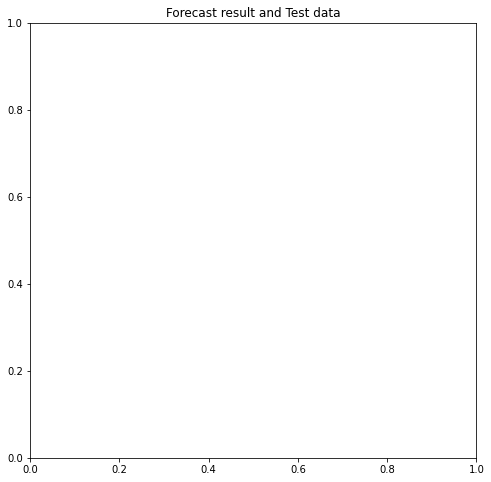

In [39]:
plt.figure(figsize  = (8,8))
plt.title('Forecast result and Test data')
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])

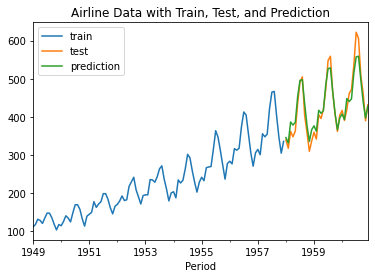

In [40]:
#Prediction
fh = np.arange(1, 37)
y_pred = forecaster.predict(fh)
#Test and Prediction Plotting
plt.title('Airline Data with Train, Test, and Prediction')
y_train.plot(label = 'train')
y_test.plot(label = 'test')
y_pred.plot(label = 'prediction')
plt.legend()

In [ ]:
# sktime

In [14]:
pip install sktime

     |████████████████████████████████| 6.6 MB 25.6 MB/s 
     |████████████████████████████████| 3.3 MB 45.7 MB/s 
     |████████████████████████████████| 34.5 MB 1.7 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


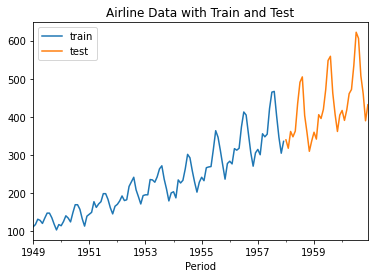

In [19]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
# from sktime.utils.plotting.forecasting import plot_ys
y = load_airline()
y_train, y_test = temporal_train_test_split(y)
plt.title('Airline Data with Train and Test')
y_train.plot(label = 'train')
y_test.plot(label = 'test')
plt.legend()

In [18]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12)
forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

AutoARIMA(sp=12)

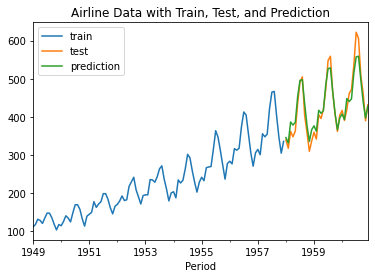

In [20]:
#Prediction
fh = np.arange(1, 37)
y_pred = forecaster.predict(fh)
#Test and Prediction Plotting
plt.title('Airline Data with Train, Test, and Prediction')
y_train.plot(label = 'train')
y_test.plot(label = 'test')
y_pred.plot(label = 'prediction')
plt.legend()

In [ ]:
# fbprophet

In [21]:
pip install prophet

In [8]:
!pip install yahoo_historical

In [25]:
from yahoo_historical import Fetcher
BBCA = Fetcher('BBCA.JK', [2012,1,1], [2022,1,1]).getHistorical()

In [26]:
BBCA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,1600.0,1600.0,1590.0,1600.0,1380.955688,7870000
1,2012-01-03,1620.0,1620.0,1590.0,1620.0,1398.217896,27775000
2,2012-01-04,1620.0,1630.0,1600.0,1620.0,1398.217896,87245000
3,2012-01-05,1610.0,1630.0,1610.0,1610.0,1389.586670,57197500
4,2012-01-06,1600.0,1610.0,1590.0,1600.0,1380.955688,27190000
...,...,...,...,...,...,...,...
2482,2021-12-24,7300.0,7350.0,7300.0,7300.0,7189.811523,30802100
2483,2021-12-27,7300.0,7350.0,7300.0,7350.0,7239.056641,20722100
2484,2021-12-28,7375.0,7400.0,7325.0,7350.0,7239.056641,39343800
2485,2021-12-29,7350.0,7375.0,7300.0,7300.0,7189.811523,42079500


In [29]:
import pandas as pd

In [31]:
BBCA['date'] = pd.to_datetime(BBCA['Date'])
BBCA = BBCA.set_index('date') 

In [33]:
BBCA = BBCA.resample('MS').mean().reset_index()[['date','Close']].rename(columns = {'date':'ds', 'Close':'y'})

In [34]:
from fbprophet import Prophet
model = Prophet()
model.fit(BBCA)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'BBCA Stock Close')

<Figure size 1296x432 with 0 Axes>

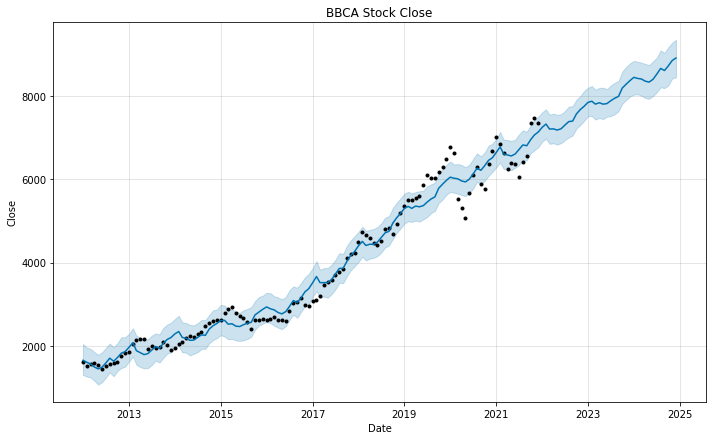

In [35]:
BBCA_forecast = model.make_future_dataframe(periods=36, freq='MS')
BBCA_forecast = model.predict(BBCA_forecast)
plt.figure(figsize=(18, 6))
model.plot(BBCA_forecast, xlabel = 'Date', ylabel = 'Close')
plt.title('BBCA Stock Close')

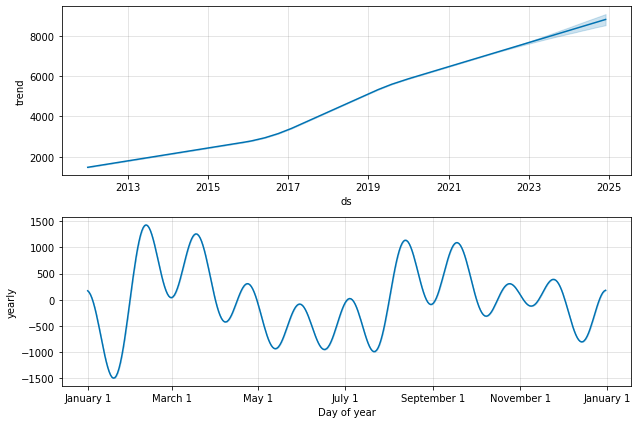

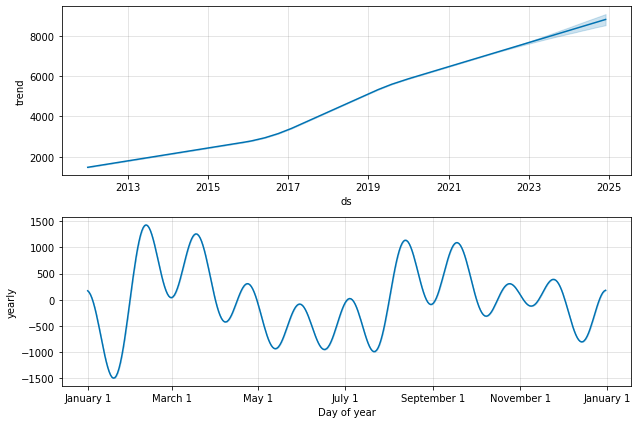

In [36]:
model.plot_components(BBCA_forecast)